In [116]:
import pandas as pd
import numpy as np
import datetime as dt
import json
np.random.seed(0)
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
#from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
import pydotplus
import statsmodels.formula.api as smf
import seaborn as sns

In [27]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [155]:
def save_object(object,filename):
    with open(filename, 'w') as f:
        json.dump(object, f)

def load_object(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return(data)

df_raw = pd.read_csv('county-food-insecurity-import.csv', encoding = 'ISO-8859-1')

In [141]:
#Regression alternative
def olsregress(df, outcome_name, list_of_dep_cols, weights):
    """Multiple linear regression function using formula method (takes df, outcome col name, and list of dependent column names)"""
    formula = f'{outcome_name} ~ '
    formula = formula+list_of_dep_cols[0]
    for column in list_of_dep_cols[1:]:
        formula = f'{formula} + {column}'
    result = smf.ols(formula=formula, data=df).fit()
    return result

population = df_raw['Population Estimate, 2016']
dep_varlist = list(df_raw.columns)
drops = ['FIPS ', 'Food', 'State', 'County', 'Population Estimate, 2016']
for item in drops:
    dep_varlist.remove(item)

olsregress(df_raw,'Food', dep_varlist, population).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Food   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     190.4
Date:                Fri, 07 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:38:14   Log-Likelihood:                -6220.2
No. Observations:                3135   AIC:                         1.257e+04
Df Residuals:                    3069   BIC:                         1.297e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                36.3082      4.028      9.014      0.000      28.411      44.206
PCT_LACCESS_POP15        -8.0720      4.474     -1.804      0.071     -16.845       0.701
PCT_LACCESS_LOWI15        0.0728      0.017      4.320      0.000       0.040       0.106
PCT_LACCESS_HHNV15        0.0122      0.018      0.689      0.491      -0.022       0.047
PCT_LACCESS_SNAP15       -0.0434      0.028     -1.572      0.116      -0.097       0.011
PCT_LACCESS_CHILD15      -0.0131      0.041     -0.320      0.749      -0.093       0.067
PCT_LACCESS_SENIORS15     0.0264      0.038      0.693      0.488      -0.048       0.101
PCT_LACCESS_WHITE15       8.0488      4.474      1.799      0.072      -0.724      16.822
PCT_LACCESS_BLACK15       8.0745      4.474      1.805      0.071      -0.698      16.847
PCT_LACCESS_HISP15       -0.0227      0.016     -1.443      0.149      -0.053       0.008
PCT_LACCESS_NHASIAN15     8.0100      4.474      1.790      0.073      -0.762      16.782
PCT_LACCESS_NHNA15        8.0621      4.474      1.802      0.072      -0.711      16.835
PCT_LACCESS_NHPI15        5.5172      4.499      1.226      0.220      -3.305      14.339
PCT_LACCESS_MULTIR15      8.2193      4.474      1.837      0.066      -0.553      16.991
GROCPTH14                -0.0842      0.219     -0.384      0.701      -0.514       0.346
SUPERCPTH14              -0.5328      1.666     -0.320      0.749      -3.799       2.733
CONVSPTH14               -0.0035      0.127     -0.027      0.978      -0.253       0.246
SPECSPTH14               -1.0416      0.480     -2.172      0.030      -1.982      -0.101
SNAPSPTH16                0.0440      0.140      0.315      0.753      -0.230       0.318
WICSPTH12                -1.1266      0.244     -4.616      0.000      -1.605      -0.648
FFRPTH14                  0.8191      0.137      5.972      0.000       0.550       1.088
FSRPTH14                 -0.1034      0.079     -1.308      0.191      -0.258       0.052
REDEMP_SNAPS16         1.057e-06   5.32e-07      1.986      0.047    1.36e-08     2.1e-06
PC_SNAPBEN15              0.0099      0.008      1.297      0.195      -0.005       0.025
PCT_FREE_LUNCH14          0.0021      0.002      0.945      0.345      -0.002       0.007
PCT_REDUCED_LUNCH14       0.0376      0.011      3.562      0.000       0.017       0.058
PC_WIC_REDEMP12          -0.0241      0.005     -4.506      0.000      -0.035      -0.014
REDEMP_WICS12          3.445e-06   8.89e-07      3.874      0.000     1.7e-06    5.19e-06
MILK_PRICE10              5.9355      1.047      5.671      0.000       3.883       7.988
SODA_PRICE10             -2.7421      0.557     -4.922      0.000      -3.834      -1.650
MILK_SODA_PRICE10        -6.4192      0.963     -6.668      0.000      -8.307      -4.532
PC_DIRSALES12          

[Text(0.5, 0, 'FIPS '),
 Text(1.5, 0, 'Food'),
 Text(2.5, 0, 'PCT_LACCESS_POP15'),
 Text(3.5, 0, 'PCT_LACCESS_LOWI15'),
 Text(4.5, 0, 'PCT_LACCESS_HHNV15'),
 Text(5.5, 0, 'PCT_LACCESS_SNAP15'),
 Text(6.5, 0, 'PCT_LACCESS_CHILD15'),
 Text(7.5, 0, 'PCT_LACCESS_SENIORS15'),
 Text(8.5, 0, 'PCT_LACCESS_WHITE15'),
 Text(9.5, 0, 'PCT_LACCESS_BLACK15'),
 Text(10.5, 0, 'PCT_LACCESS_HISP15'),
 Text(11.5, 0, 'PCT_LACCESS_NHASIAN15'),
 Text(12.5, 0, 'PCT_LACCESS_NHNA15'),
 Text(13.5, 0, 'PCT_LACCESS_NHPI15'),
 Text(14.5, 0, 'PCT_LACCESS_MULTIR15'),
 Text(15.5, 0, 'GROCPTH14'),
 Text(16.5, 0, 'SUPERCPTH14'),
 Text(17.5, 0, 'CONVSPTH14'),
 Text(18.5, 0, 'SPECSPTH14'),
 Text(19.5, 0, 'SNAPSPTH16'),
 Text(20.5, 0, 'WICSPTH12'),
 Text(21.5, 0, 'FFRPTH14'),
 Text(22.5, 0, 'FSRPTH14'),
 Text(23.5, 0, 'REDEMP_SNAPS16'),
 Text(24.5, 0, 'PC_SNAPBEN15'),
 Text(25.5, 0, 'PCT_FREE_LUNCH14'),
 Text(26.5, 0, 'PCT_REDUCED_LUNCH14'),
 Text(27.5, 0, 'PC_WIC_REDEMP12'),
 Text(28.5, 0, 'REDEMP_WICS12'),
 Text(29.5, 0

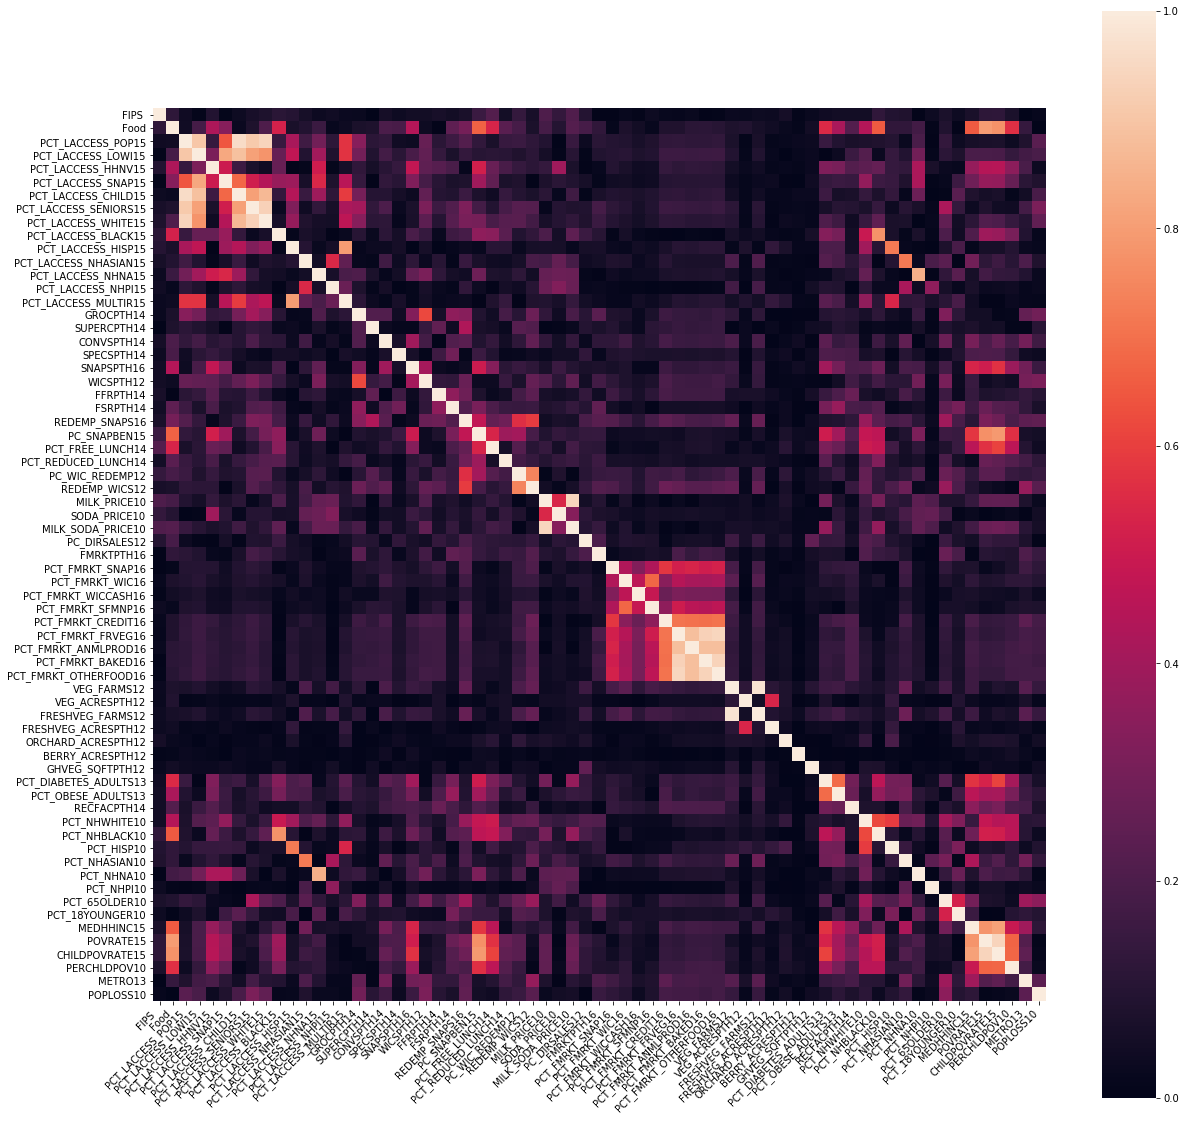

In [142]:
corr = np.abs(df_raw.corr())
plt.figure(figsize=(20,20))
ax = sns.heatmap(
    corr, 
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

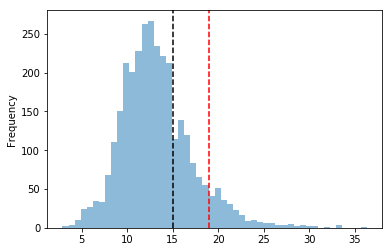

In [156]:
# Recoding Food Output to Categorical

def recode_food(df):
    def recode_food_col(x):
        if x < 15:
            return 'Low-Mid'
        if x <19:
            return 'High'
        else:
            return 'V-High'
    df['Food']=df['Food'].apply(recode_food_col)
    return df

ax = df_raw['Food'].plot.hist(bins=50, alpha=0.5)
ax.axvline(15, color="black", linestyle="--")
ax.axvline(19, color="red", linestyle="--")


df = recode_food(df_raw)

#print(df_raw.head())



In [157]:
#Subsetting columns for analysis
df.fillna(df.mean(),inplace = True)
df.describe()

def keep_cols(df, col_list):
    cols_keepdict = {}
    for item in list(df.columns):
        cols_keepdict[item] = 0
    for col in col_list:
        cols_keepdict[col] = 1
    drop = list(df.columns)
    for item in cols_keepdict.keys():
        if cols_keepdict[item] == 1:
            drop.remove(item)
    return df.drop(labels = drop, axis = 1)


In [185]:
def make_xy(df):
    pred_cols = list(df.columns)
    pred_cols.remove(outcome_label)
    x = df.loc[:, pred_cols]
    y = df.loc[:, outcome_label]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 0)
    tts_dict = {}
    tts_dict['x_train'] = x_train
    tts_dict['x_test'] = x_test
    tts_dict['y_train'] = y_train
    tts_dict['y_test'] = y_test
    return tts_dict

def tree_classifier(tts_dict, criterion_input = 'entropy', max_depth_input = 10, min_samples_input = 3):
    clf = DecisionTreeClassifier(criterion = criterion_input, max_depth = max_depth_input, min_samples_split = min_samples_input)
    clf.fit(tts_dict['x_train'], tts_dict['y_train'])
    print('Accuracy: ', 100*round( accuracy_score( tts_dict['y_test'], clf.predict( tts_dict['x_test'])), 4), ' %') 
    return clf

def random_tree_classifier(tts_dict):
    clf = RandomForestClassifier(n_estimators = 100)
    clf.fit(tts_dict['x_train'], tts_dict['y_train'])
    print('Accuracy: ', 100*round( accuracy_score( tts_dict['y_test'], clf.predict( tts_dict['x_test'])), 4), ' %')
    return clf 


def tree_feature_graph(clf, tts_dict):
    n_features = tts_dict['x_train'].shape[1]
    plt.figure(figsize=(8,16))
    plt.barh(range(n_features), clf.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), tts_dict['x_train'].columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

def dot_graph(clf, tts_dict):
    dot_data = export_graphviz(clf, out_file = None, feature_names = x_train.columns, class_names = np.unique(tts_dict['y_train']).astype('str'), filled = True, rounded = True, special_characters = True)

    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"30,30!"')
    pydot_graph.write_png('tree_output.png')  

label_list = ['Low-Mid', 'High', 'V-High']

def create_confusion_matrix(clf, tts_dict):
    predicted = clf.predict(tts_dict['x_test'])
    results = tts_dict['y_test']
    cm = confusion_matrix(results, predicted, labels = label_list)
    return cm

In [149]:
 def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion Matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Accuracy:  81.55  %


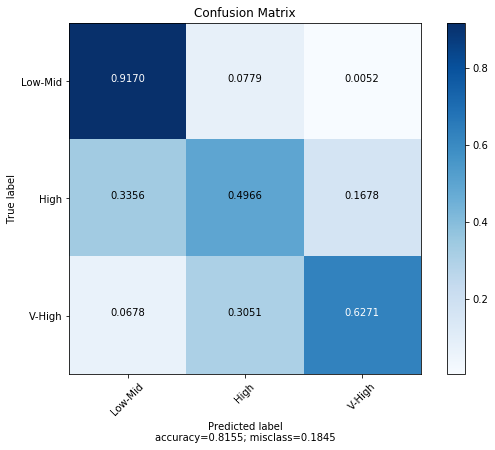

Accuracy:  83.59  %


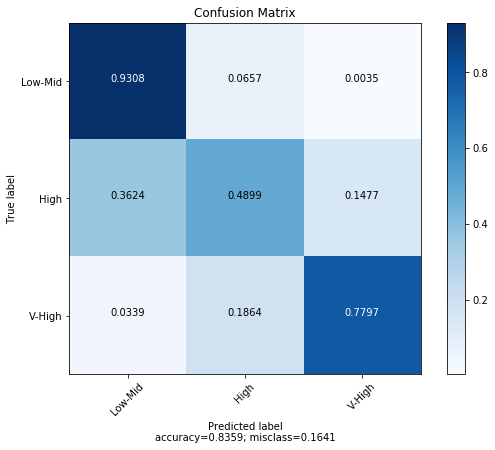

Accuracy:  81.55  %


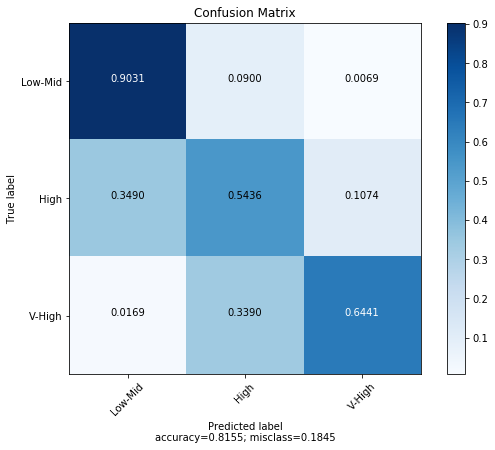

In [172]:
outcome_label = 'Food'

#drops.remove('Food')
all_cols = list(df.drop(labels = drops, axis = 1).columns)
col_list = ['Food', 'POVRATE15', 'PCT_NHBLACK10', 'PCT_HISP10', 'SPECSPTH14', 'PCT_LACCESS_LOWI15', 'WICSPTH12', 'FFRPTH14', 'MILK_SODA_PRICE10', 'FMRKTPTH16']
col_list_alt = ['Food', 'POVRATE15', 'PCT_NHBLACK10', 'PCT_HISP10', 'MILK_SODA_PRICE10', 'CHILDPOVRATE15', 'PCT_18YOUNGER10','PCT_NHNA10']
col_list_3 = ['Food', 'POVRATE15', 'PCT_NHBLACK10', 'PCT_HISP10', 'MILK_SODA_PRICE10', 'CHILDPOVRATE15', 'PCT_18YOUNGER10','PCT_NHNA10', 'PCT_LACCESS_LOWI15']

tts_short = make_xy( keep_cols( df, col_list ))
tts_all = make_xy( keep_cols( df, all_cols ))
tts_alt = make_xy( keep_cols( df, col_list_alt ))
tts_3 = make_xy ( keep_cols( df, col_list_3 ))

#Tree Classification & Outputs
clf_short = tree_classifier( tts_short )
plot_confusion_matrix(create_confusion_matrix( clf_short, tts_short ),
                          label_list,
                          title='Confusion Matrix',
                          cmap=None,
                          normalize=True)

clf_alt = tree_classifier( tts_alt )
plot_confusion_matrix(create_confusion_matrix( clf_alt, tts_alt ),
                          label_list,
                          title='Confusion Matrix',
                          cmap=None,
                          normalize=True)

clf_all = tree_classifier( tts_all )
plot_confusion_matrix(create_confusion_matrix( clf_all, tts_all ),
                          label_list,
                          title='Confusion Matrix',
                          cmap=None,
                          normalize=True)


#tree_feature_graph(clf_short, tts_short)
#tree_feature_graph(clf_all, tts_all )
#tree_feature_graph(clf_alt, tts_alt )


In [162]:
def gridsearch_check(tts_dict):
    clf = DecisionTreeClassifier()

    param_grid = {
        'criterion': ['entropy'],
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
        'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    }

    gs_tree = GridSearchCV(clf, param_grid, cv=10)
    gs_tree.fit(tts_dict['x_train'], tts_dict['y_train'])

    return(gs_tree.best_params_)



{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 6}


In [ ]:
print(gridsearch_check(tts_short))

In [163]:
print(gridsearch_check(tts_alt))

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 15}


In [173]:
print(gridsearch_check(tts_3))

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 4}


In [164]:
print(gridsearch_check(tts_all))

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}


Accuracy:  82.44  %
Accuracy:  83.59  %
Accuracy:  83.72  %
Accuracy:  81.17  %


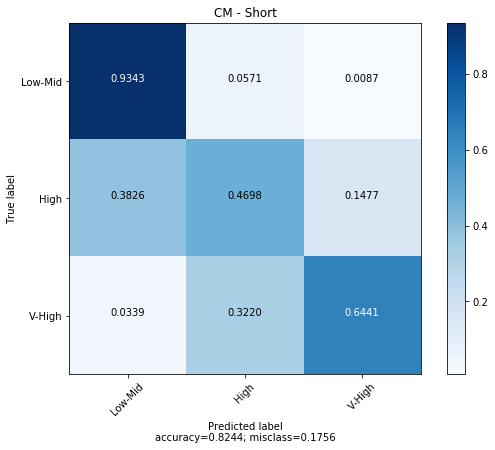

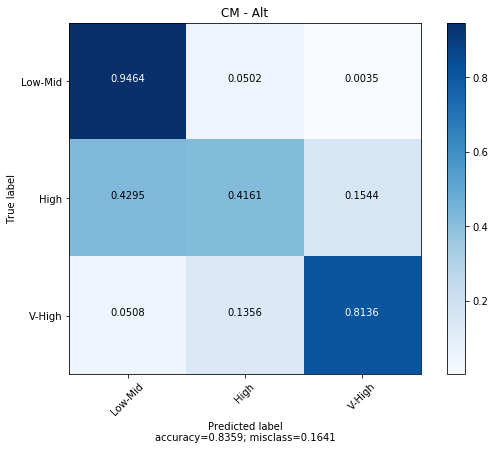

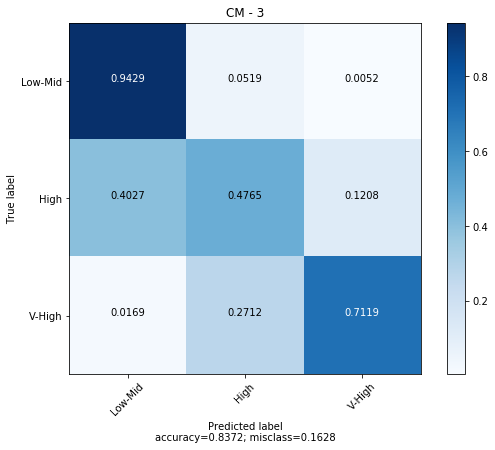

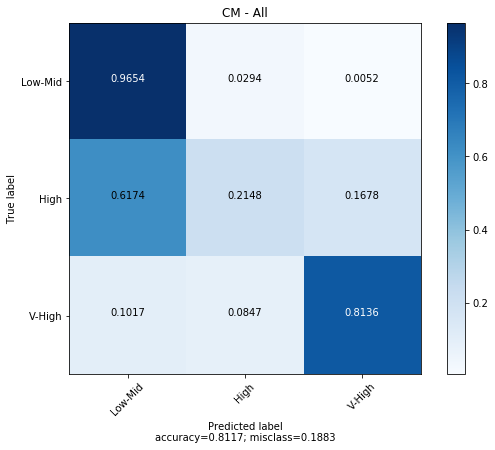

In [174]:
clf_short_optimized = tree_classifier( tts_short , criterion_input = 'entropy', max_depth_input = 7, min_samples_input = 6)
clf_alt_optimized = tree_classifier( tts_alt , criterion_input = 'entropy', max_depth_input = 8, min_samples_input = 15)
clf_3_optimized = tree_classifier( tts_3 , criterion_input = 'entropy', max_depth_input = 11, min_samples_input = 4)
clf_all_optimized = tree_classifier( tts_all , criterion_input = 'entropy', max_depth_input = 4, min_samples_input = 2)

plot_confusion_matrix(create_confusion_matrix( clf_short_optimized, tts_short ),
                          label_list,
                          title='CM - Short',
                          cmap=None,
                          normalize=True)

plot_confusion_matrix(create_confusion_matrix( clf_alt_optimized, tts_alt ),
                          label_list,
                          title='CM - Alt',
                          cmap=None,
                          normalize=True)

plot_confusion_matrix(create_confusion_matrix( clf_3_optimized, tts_3 ),
                          label_list,
                          title='CM - 3',
                          cmap=None,
                          normalize=True)

plot_confusion_matrix(create_confusion_matrix( clf_all_optimized, tts_all ),
                          label_list,
                          title='CM - All',
                          cmap=None,
                          normalize=True)

Accuracy:  86.13  %
Accuracy:  85.5  %
Accuracy:  86.00999999999999  %
Accuracy:  85.5  %


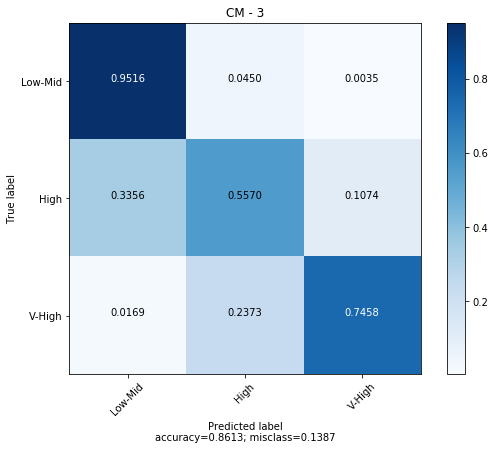

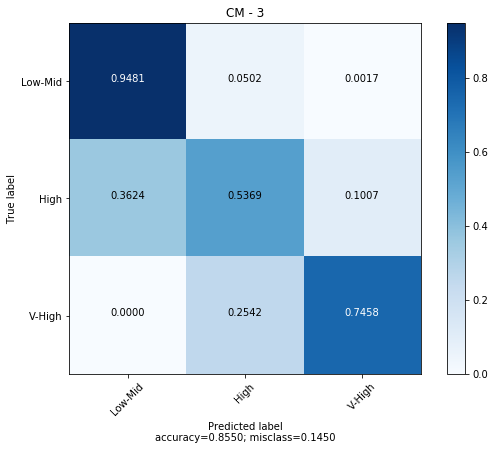

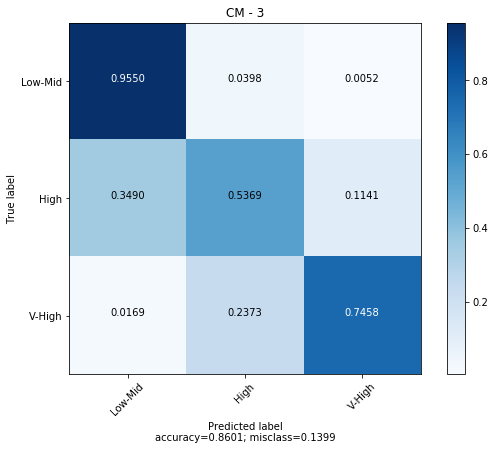

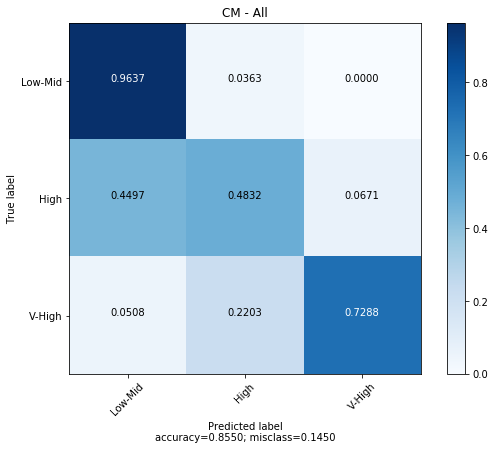

In [184]:
clf_alt_random = random_tree_classifier( tts_alt )
clf_short_random = random_tree_classifier( tts_short )
clf_3_random = random_tree_classifier( tts_3 )
clf_all_random = random_tree_classifier( tts_all )


plot_confusion_matrix(create_confusion_matrix( clf_alt_random, tts_alt ),
                          label_list,
                          title='CM - 3',
                          cmap=None,
                          normalize=True)
plot_confusion_matrix(create_confusion_matrix( clf_short_random, tts_short ),
                          label_list,
                          title='CM - 3',
                          cmap=None,
                          normalize=True)
plot_confusion_matrix(create_confusion_matrix( clf_3_random, tts_3 ),
                          label_list,
                          title='CM - 3',
                          cmap=None,
                          normalize=True)

plot_confusion_matrix(create_confusion_matrix( clf_all_random, tts_all ),
                          label_list,
                          title='CM - All',
                          cmap=None,
                          normalize=True)

In [ ]:
# Decision Surface Plot For Subset of Features

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()


In [ ]:
#Regression alternative
def olsregress(df, outcome_name, list_of_dep_cols):
    """Multiple linear regression function using formula method (takes df, outcome col name, and list of dependent column names)"""
    formula = f'{outcome_name} ~ '
    formula = formula+list_of_dep_cols[0]
    for column in list_of_dep_cols[1:]:
        formula = f'{formula} + {column}'
    result = sm.ols(formula=formula, data=dataframe).fit()
    return result

olsregress(order,'QuantityOverBaseline',['Discount']).summary()